In [1]:
import pandas as pd
import numpy as np


dates_df = pd.read_csv(
    'hep-th-slacdates_unzipped.txt', 
    sep=' ', 
    header=None, 
    names=['id_paper', 'slac_date']
)
dates_df['slac_date'] = pd.to_datetime(dates_df['slac_date'])

df_citations = pd.read_csv(
    'hep-th-citations_unzipped.txt', 
    sep=' ', 
    header=None, 
    names=['id_from', 'id_to']
)

df = pd.merge(
    df_citations, 
    dates_df, 
    how="left", 
    left_on='id_from', 
    right_on='id_paper'
)

df = pd.merge(
    df, 
    dates_df, 
    how="left", 
    left_on='id_to', 
    right_on='id_paper'
).rename(
    columns={
        "slac_date_x": "date_from", 
        "slac_date_y": "date_to"
    }, 
).drop(
    columns=['id_paper_x', 'id_paper_y']
)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352807 entries, 0 to 352806
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id_from    352807 non-null  int64         
 1   id_to      352807 non-null  int64         
 2   date_from  352807 non-null  datetime64[ns]
 3   date_to    352807 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 13.5 MB
None


,id_from,id_to,date_from,date_to
0,1001,9304045,2000-01-04,1993-04-13
1,1001,9308122,2000-01-04,1993-08-30
2,1001,9309097,2000-01-04,1993-09-24
3,1001,9311042,2000-01-04,1993-11-12
4,1001,9401139,2000-01-04,1994-02-04


In [2]:
df = df[df['date_from']>=df['date_to']]
len(df)

351763

count    351763.000000
mean        782.424416
std         760.651407
min           0.000000
25%         220.000000
50%         540.000000
75%        1113.000000
max        9435.000000
Name: days_between, dtype: float64


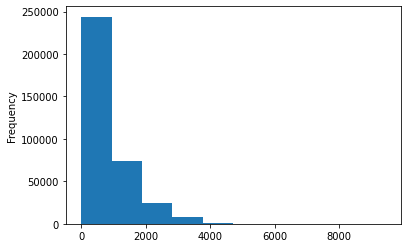

In [3]:
df['days_between'] = (df['date_from'] - df['date_to']).dt.days

print(df['days_between'].describe())
df['days_between'].plot(kind='hist')

In [4]:
citations_per_paper = df[
    df['days_between']<=90
].groupby('id_to')[['id_from']].nunique().rename(
    columns={"id_from": "first_90_days"}
)

citations_per_paper['first_180_days'] = df[
    df['days_between']<=180
].groupby('id_to')['id_from'].nunique()

citations_per_paper['first_365_days'] = df[
    df['days_between']<=365
].groupby('id_to')['id_from'].nunique()

citations_per_paper['first_730_days'] = df[
    df['days_between']<=730
].groupby('id_to')['id_from'].nunique()

citations_per_paper.fillna(0, inplace=True)

print(citations_per_paper.describe())
citations_per_paper.head()

       first_90_days  first_180_days  first_365_days  first_730_days
count   11644.000000    11644.000000    11644.000000    11644.000000
mean        3.407077        5.905101       10.061577       15.296204
std         4.756571        8.663462       16.270693       29.047189
min         1.000000        1.000000        1.000000        1.000000
25%         1.000000        2.000000        2.000000        3.000000
50%         2.000000        3.000000        5.000000        7.000000
75%         4.000000        7.000000       11.000000       17.000000
max        96.000000      206.000000      405.000000     1000.000000


,first_90_days,first_180_days,first_365_days,first_730_days
id_to,,,,
1002,16,23,35,43
1003,9,13,14,15
1004,1,1,1,1
1010,1,3,5,9
1011,2,2,3,4


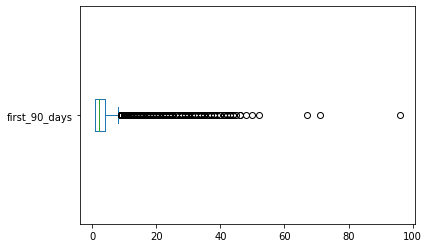

In [5]:
citations_per_paper['first_90_days'].plot(kind='box', vert=False)

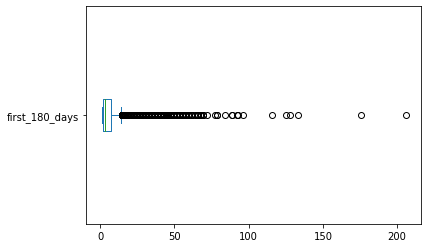

In [6]:
citations_per_paper['first_180_days'].plot(kind='box', vert=False)

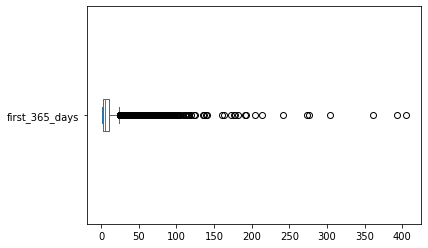

In [7]:
citations_per_paper['first_365_days'].plot(kind='box', vert=False)

In [8]:
citations_per_paper.corr()

,first_90_days,first_180_days,first_365_days,first_730_days
first_90_days,1.000000,0.927761,0.818391,0.690332
first_180_days,0.927761,1.000000,0.944635,0.838758
first_365_days,0.818391,0.944635,1.000000,0.950696
first_730_days,0.690332,0.838758,0.950696,1.000000


In [9]:
pd.cut(
    citations_per_paper['first_90_days'], 
    [0, 5, 10, 96]
).value_counts()/len(citations_per_paper)

(0, 5]      0.845586
(5, 10]     0.096616
(10, 96]    0.057798
Name: first_90_days, dtype: float64

In [10]:
pd.cut(
    citations_per_paper['first_180_days'], 
    [0, 10, 20, 206]
).value_counts()/len(citations_per_paper)

(0, 10]      0.855891
(10, 20]     0.094469
(20, 206]    0.049639
Name: first_180_days, dtype: float64

In [11]:
pd.cut(
    citations_per_paper['first_365_days'], 
    [0, 15, 30, 405]
).value_counts()/len(citations_per_paper)

(0, 15]      0.826434
(15, 30]     0.109413
(30, 405]    0.064153
Name: first_365_days, dtype: float64